# Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
from statsFuncs import mean_confidence_interval

mpl.rcParams['axes.linewidth'] = 2

# Paths 

In [2]:
fig3_path = os.getcwd()
figures_path = str(Path(fig3_path).parent)
datapath = figures_path + '/Analysis5_4_2020/yes removal yes correction/'

# Plot params 

In [3]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Subject loop 

Get number of subjects, which is number of folders in datapath -1 (the super subject)

In [4]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects = folders-1

85 files, 14 folders
13 subjects


In [5]:
subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 'SuperSubject']

In [6]:
alldata_trimed = pd.DataFrame()
alldata = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_VALUES'])

row = 0
for subject in subject_names:
    subjectdata_temp = pd.DataFrame()
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata_temp['BOOTSTRAP_VALUES'] = subjectdata['bootstrap_values']
    subjectdata_temp.loc[:, 'SUBJECT'] = subject
    
    print(subject)
    alldata_trimed.loc[row,'SUBJECT'] = subject
    
    mean, ci_low, ci_up = mean_confidence_interval.mean_confidence_interval(subjectdata['bootstrap_values'])
    
    alldata_trimed.loc[row, 'BOOTSTRAP_MEAN'] = mean
    alldata_trimed.loc[row, 'BOOTSTRAP_CI_LOW'] = ci_low
    alldata_trimed.loc[row, 'BOOTSTRAP_CI_UP'] = ci_up
    
    if subject == 'S1':
        alldata = subjectdata_temp
    else:
        alldata = pd.concat([alldata, subjectdata_temp])
    
    row += 1
    

S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15
SuperSubject


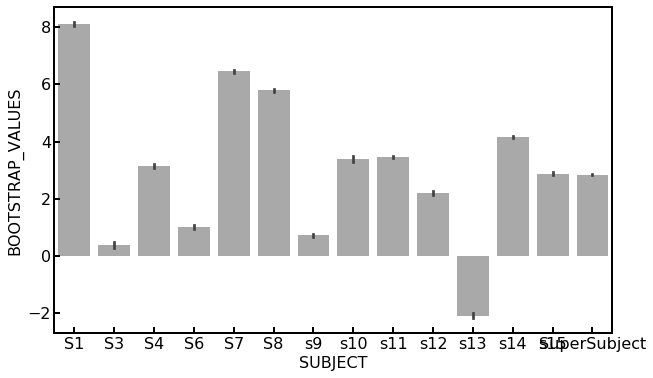

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="SUBJECT", y="BOOTSTRAP_VALUES", data=alldata, color='darkgray', ci=95)

In [8]:
alldata_trimed_ci = pd.DataFrame(columns= subject_names)
for i in range(len(alldata_trimed)):
    
    print(i)
    subject = alldata_trimed.loc[i, 'SUBJECT']
    low = alldata_trimed.loc[i, 'BOOTSTRAP_MEAN'] - alldata_trimed.loc[i, 'BOOTSTRAP_CI_LOW']
    up = alldata_trimed.loc[i, 'BOOTSTRAP_CI_UP'] - alldata_trimed.loc[i, 'BOOTSTRAP_MEAN'] 
    
    alldata_trimed_ci.loc[0, subject] = low
    alldata_trimed_ci.loc[1, subject] = up

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [9]:
alldata_trimed_ci

,S1,S3,S4,S6,S7,S8,s9,s10,s11,s12,s13,s14,s15,SuperSubject
0,0.0761677,0.0968881,0.0659523,0.0745383,0.0610564,0.0494722,0.0489629,0.105864,0.0419071,0.0818207,0.0988455,0.0399022,0.058655,0.0130248
1,0.0761677,0.0968881,0.0659523,0.0745383,0.0610564,0.0494722,0.0489629,0.105864,0.0419071,0.0818207,0.0988455,0.0399022,0.058655,0.0130248


<BarContainer object of 14 artists>

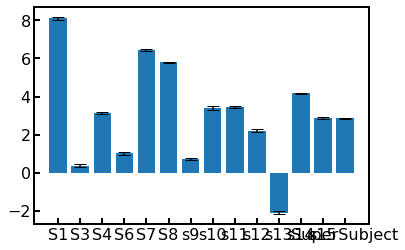

In [10]:
plt.bar(alldata_trimed['SUBJECT'], alldata_trimed['BOOTSTRAP_MEAN'], yerr=alldata_trimed_ci.to_numpy(), ecolor='black',
       capsize=6)

In [11]:
alldata_trimed = pd.DataFrame()
alldata = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_VALUES'])

row = 0
for subject in subject_names:
    subjectdata_temp = pd.DataFrame()
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata_temp['BOOTSTRAP_VALUES'] = subjectdata['bootstrap_values']
    subjectdata_temp.loc[:, 'SUBJECT'] = subject
    
    print(subject)
    alldata_trimed.loc[row,'SUBJECT'] = subject
    
    mean, ci_95 = mean_confidence_interval.alternative_mean_confidence_interval(subjectdata['bootstrap_values'])
    
    alldata_trimed.loc[row, 'BOOTSTRAP_MEAN'] = mean
    alldata_trimed.loc[row, 'BOOTSTRAP_CI_LOW'] = ci_95
    alldata_trimed.loc[row, 'BOOTSTRAP_CI_UP'] = ci_95
    
    if subject == 'S1':
        alldata = subjectdata_temp
    else:
        alldata = pd.concat([alldata, subjectdata_temp])
    
    row += 1
    

S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15
SuperSubject


In [ ]:
cis_fixed = 

<BarContainer object of 14 artists>

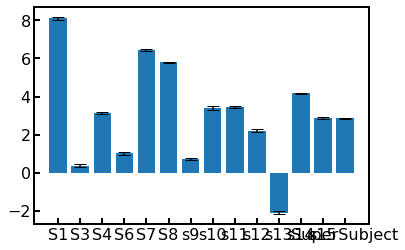

In [14]:
plt.bar(alldata_trimed['SUBJECT'], alldata_trimed['BOOTSTRAP_MEAN'], yerr=alldata_trimed['BOOTSTRAP_CI_LOW'].to_numpy(), ecolor='black',
       capsize=6)